# Clustering the Countries by using Unsupervised Learning for HELP International

#### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

#### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

#### Solution:

This solution uses 3 Clustering techniques: KMeans, Hierarchial and DBSCAN clustering and compares the performances of each. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

# Overview:

In [2]:
df_main = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv")
df_main

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df_main.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df = df_main.drop(['country'], axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**** 

# Correlation between features:

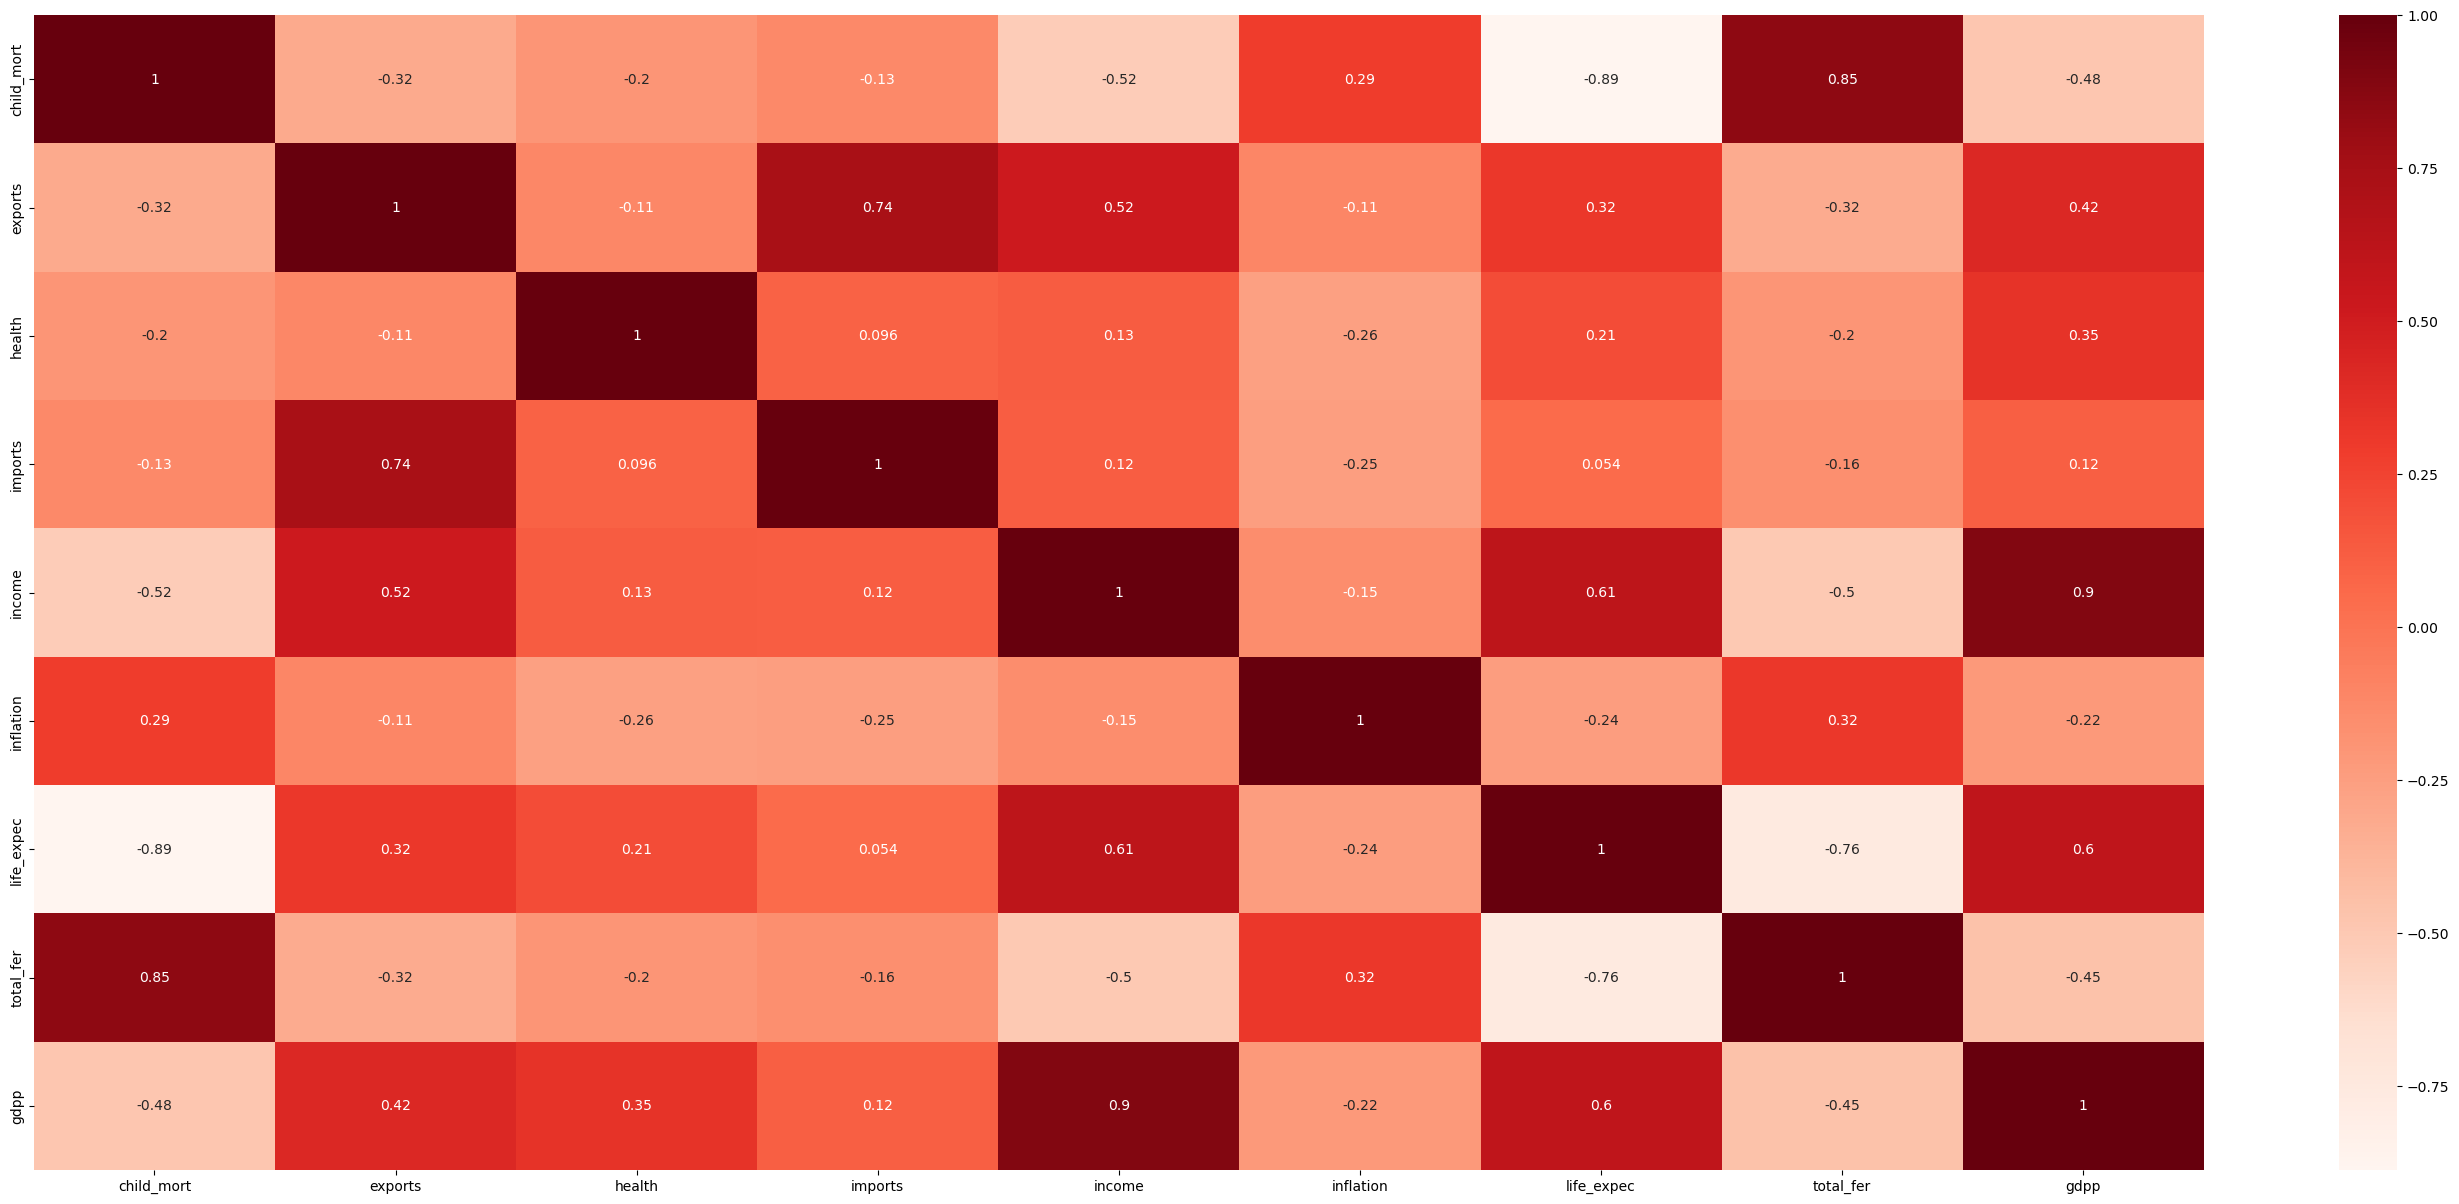

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(35,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

****

#  Scaling data using standard scaler: 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns) 
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [7]:
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,-1.063687e-17,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


****

# Selecting the features with highest variability using principal component analysis:

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(df_scaled)

col_names = df_scaled.columns.tolist()

pca_df = pd.DataFrame(data=pca_data, columns=['PCA_' + str(i) for i in range(1, pca.n_components_+1)])
pca_df.columns = col_names
print(pca_df.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310  -0.254597    0.383000   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677   0.084579    0.248919   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475  -0.401696   -0.087214   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209  -0.547996   -0.440835   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007  -0.206919    0.241978   

   total_fer      gdpp  
0   0.415076 -0.014148  
1  -0.221042  0.173316  
2  -0.184162  0.084037  
3  -0.355998 -0.091339  
4  -0.023681  0.094270  


In [9]:
pca_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


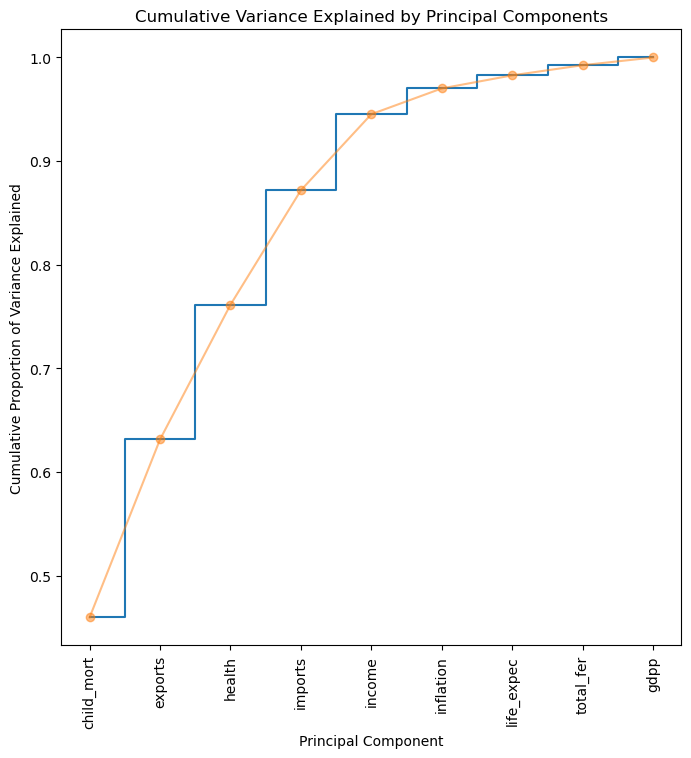

In [10]:
plt.rcParams['figure.figsize'] = 8, 8
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')


plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), list(df_scaled.columns), rotation=90)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'o-', alpha=0.5)


plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


#### It can be observed that the first five features show the highest variability and hence we drop the remaining.

In [11]:
data = pca_df.drop(['inflation', 'life_expec', 'total_fer', 'gdpp'], axis=1)
data

,child_mort,exports,health,imports,income
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


****

# 1. KMeans Clustering.

* K-means clustering is a type of unsupervised learning algorithm used in machine learning. The goal of k-means clustering is to divide a dataset into K clusters, where K is a pre-specified number of clusters.

* To achieve this goal, the algorithm starts by randomly selecting K points from the dataset as initial "centroids" of the clusters.

* Each data point is then assigned to the cluster whose centroid it is closest to (in terms of Euclidean distance). This forms an initial clustering of the data.

* A centroid refers to the center point of a cluster. It is a data point that represents the "average" of all the data points in a given cluster, in terms of their numerical values. The centroid is calculated as the arithmetic mean of all the data points in the cluster.

* Next, the algorithm re-calculates the centroids of each cluster as the mean of all the data points assigned to that cluster. This means that the centroid will move towards the center of the data points assigned to it.

* Then, each data point is re-assigned to the cluster whose centroid it is closest to. This step is repeated until the centroids no longer move, or until a pre-specified number of iterations is reached.

* Once the k-means clustering algorithm has finished, we have K clusters of data points that are similar to each other, and different from data points in other clusters. We can use these clusters for a variety of purposes, such as understanding patterns in the data or making predictions for new data points.

* Overall, k-means clustering is a simple and effective way to cluster data into groups based on their similarity, and is widely used in many applications such as image segmentation, market segmentation, and customer segmentation.

### Determining the optimal number of clusters using the Elbow Method: 

 The elbow method is a technique used to determine the optimal number of clusters in a dataset. It is a graphical representation of the variance explained as a function of the number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to level off or decrease.

 Working of the Elbow Method:

*  First, we need to determine the SSE for a range of possible values of k (number of clusters).

* SSE stands for Sum of Squared Errors, also known as the sum of squared distances between each data point and its corresponding centroid in k-means clustering. It is a measure of how far apart the data points are from their assigned centroids, and thus represents the overall variation within a cluster.

* Then, we plot the SSE values against the number of clusters k.

* We then examine the plot and identify the "elbow" or "bend" point, where the SSE starts to level off or decrease significantly.

* This "elbow point" indicates the optimal number of clusters for the given dataset.

* The intuition behind this method is that as we increase the number of clusters, the SSE will decrease. However, beyond a certain point, adding more clusters will not lead to a significant decrease in SSE. The elbow point represents the point where the benefit of adding an additional cluster is no longer worth the cost of the increased complexity.

### a) For data with features selected using PCA:

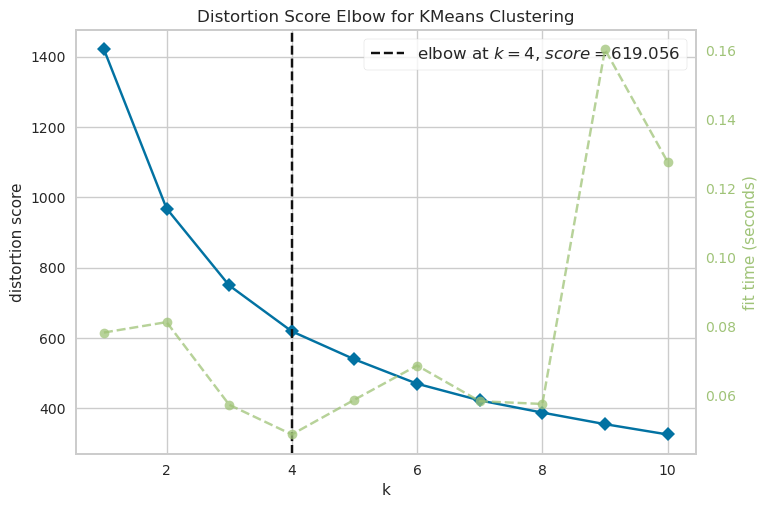

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,11)) # Instantiate a KElbowVisualizer object
visualizer.fit(data)
visualizer.show()


#### Taking number of clusters as 4:

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels = kmeans.labels_

predictions_pca = pd.Series(labels)

print("Cluster assignments:\n", labels)

Cluster assignments:
 [1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [14]:
predictions_pca

0      1
1      0
2      0
3      1
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Length: 167, dtype: int32

In [15]:
# Get the value counts and percentages of each class
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")


Value counts:
Class 0: 87
Class 1: 47
Class 2: 30
Class 3: 3

Percentages:
Class 0: 52.10%
Class 1: 28.14%
Class 2: 17.96%
Class 3: 1.80%


### b) For scaled data without pca feature selection:

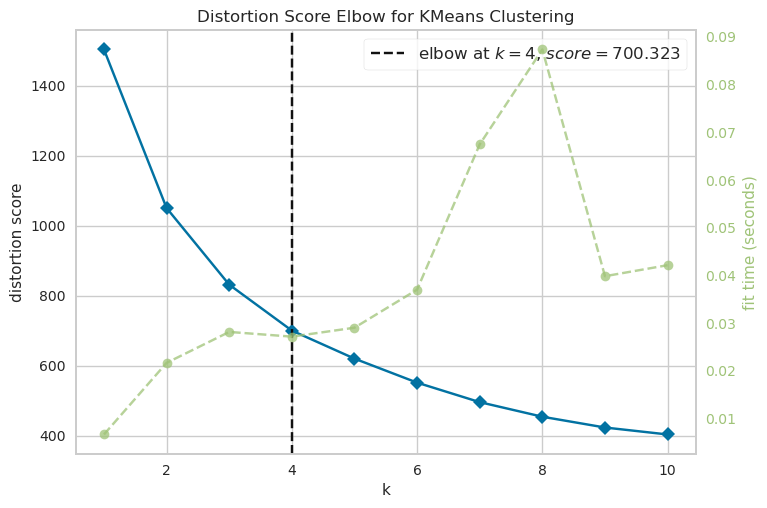

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_scaled)
visualizer.show()


#### taking number of clusters as 4:

In [17]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(df_scaled)

labels = kmeans.labels_
predictions_scaled = pd.Series(labels)

print("Cluster assignments:\n", labels)

Cluster assignments:
 [1 0 0 1 0 0 0 3 3 0 3 0 0 0 0 3 0 1 0 0 0 0 0 3 0 1 1 0 1 3 0 1 1 0 0 0 1
 1 1 0 1 0 3 3 3 0 0 0 0 1 1 0 0 3 3 1 1 0 3 1 3 0 0 1 1 0 1 0 3 0 0 0 0 3
 3 3 0 3 0 0 1 1 3 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 3
 3 1 1 3 0 1 0 0 0 0 0 3 3 0 0 1 0 0 1 0 0 1 2 0 3 0 1 3 3 0 0 1 0 3 3 0 1
 0 1 1 0 0 0 0 1 0 3 3 3 0 0 0 0 0 1 1]


In [18]:
# Get the value counts and percentages of each class
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")


Value counts:
Class 0: 87
Class 1: 45
Class 2: 3
Class 3: 32

Percentages:
Class 0: 52.10%
Class 1: 26.95%
Class 2: 1.80%
Class 3: 19.16%




## Evaluation metrics:







#### 1) Silhouette score: 

* The silhouette score is a measure of how well each data point in a cluster is separated from other clusters. It is used to evaluate the performance of clustering algorithms.

* For each data point in a cluster, the silhouette score is calculated as the difference between the mean distance to the other data points in the same cluster and the mean distance to the data points in the nearest cluster.

* **The silhouette score ranges from -1 to 1**, where a score of -1 indicates that the data point is probably in the wrong cluster, 0 indicates that the data point is close to the boundary between two clusters, and 1 indicates that the data point is well within its own cluster.

* To get the silhouette score for an entire clustering solution, the average of the silhouette scores for all the data points in the dataset is calculated.

* **Higher silhouette scores indicate better-defined clusters** , while scores close to zero indicate that the clusters may be overlapping or poorly defined.


#### 2) Davies Bouldin Index:

* The Davies-Bouldin index is a method for evaluating the performance of clustering algorithms. It provides a quantitative measure of the quality of the clustering result, based on the distance between clusters and the size of the clusters.

* The Davies-Bouldin index is calculated for each cluster in the data set, and then the results are averaged over all clusters to obtain a single score. The score is calculated by finding the ratio of the average distance between points in a cluster to the average distance between points in different clusters. **The lower the score, the better the clustering result.**

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [20]:
print('Silhouette Score:', '%.2f'%silhouette_score(df_scaled, predictions_scaled))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(df_scaled, predictions_scaled))

Silhouette Score: 0.30
Davies Bouldin Score: 1.05


In [21]:
print('Silhouette Score:', '%.2f'%silhouette_score(data, predictions_pca))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(data, predictions_pca))

Silhouette Score: 0.33
Davies Bouldin Score: 0.97


#### As the dataset with the pca-selected features gave a higher silhouette score and lower davies bouldin score, we will use pca data for the rest of the clustering models.

****

# 2. Hierarchial Clustering:

 Hierarchial clustering is based on the idea of building a hierarchy of clusters, where each cluster is a subset of the larger clusters, and the largest cluster contains all data points.

Hierarchical clustering can be done in two ways:

* Agglomerative clustering: It is a bottom-up approach, where each data point is considered as a separate cluster, and then clusters are iteratively merged together based on the similarity of their data points until only one cluster remains.

* Divisive clustering: It is a top-down approach, where all data points are considered as a single cluster, and then clusters are iteratively divided into smaller clusters based on the dissimilarity of their data points until each data point is in its own cluster.

The similarity between data points is measured using a distance metric, such as Euclidean distance or cosine distance. There are different methods for measuring the distance between clusters, such as single linkage, complete linkage, and average linkage.

Hierarchical clustering produces a dendrogram, which is a tree-like diagram that shows the hierarchy of clusters. The dendrogram can be used to determine the number of clusters that should be used for the analysis. This can be done by cutting the dendrogram at a certain level and observing the resulting clusters.

Hierarchical clustering is useful for identifying patterns in data when the number of clusters is not known a priori, or when the data is not easily separable. It is widely used in various fields, such as biology, marketing, and finance.

#### Finding number of clusters using a dendogram

Ward's method is a commonly used linkage method in agglomerative clustering. It aims to minimize the variance within each cluster when merging, which leads to more compact and spherical clusters. It works by computing the sum of squared differences between all data points in a cluster and the centroid of that cluster, and then merging the two clusters whose sum of squared differences is the smallest.



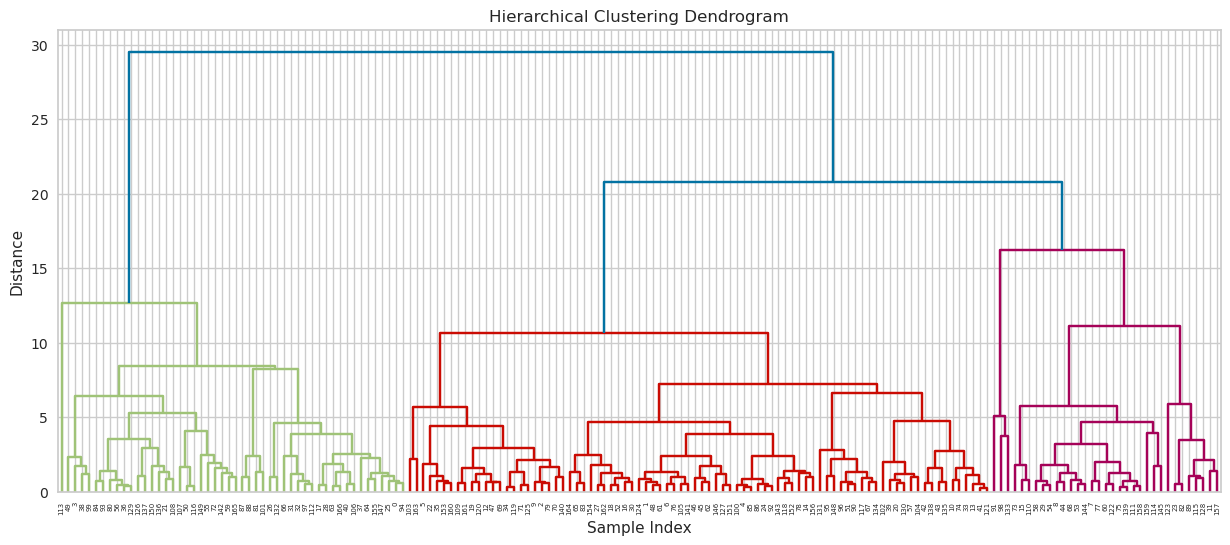

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


Z = linkage(data, method='ward', metric='euclidean')

plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


#### It is observed that after the 3rd level, we reach the elbow point, which is the point on the dendrogram where the vertical distance between two successive levels of the dendrogram starts to decrease more slowly, indicating that the gain in information by adding more clusters is decreasing.

#### Taking number of clusters as 3.

### Applying agglomerative Clustering:

Agglomerative clustering is a type of hierarchical clustering method used in data science and machine learning to group similar data points together. This algorithm starts with each point as its own cluster and then iteratively merges clusters based on some similarity criteria, until a stopping condition is met, such as a desired number of clusters or a threshold level of similarity.

The agglomerative clustering algorithm works as follows:

* Initialize each data point as a cluster of its own.
* Calculate the distance (similarity) between all pairs of clusters.
* Merge the two closest clusters into a single cluster.
* Recalculate the distance between the new cluster and all remaining clusters.
* Repeat steps 3 and 4 until all data points belong to a single cluster.
* The distance between clusters can be calculated using a variety of methods, including Ward's method, complete linkage, single linkage, and average linkage. Each method has its own way of defining the distance between clusters.



In [23]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(data)
labels = clustering.labels_

print("Cluster assignments:\n", labels)

Cluster assignments:
 [1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 2 2 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 2 0 2 0 2 2 1 1 0 2 1 2 2 1 1 0 2 0 2 1 1 2 2 1 0 1 2 1 2 2 2 2 1 1 1 2 0
 0 1 1 0 0 1 2 2 2 2 2 0 0 2 2 1 2 0 1 2 2 1 0 2 2 1 1 2 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [24]:
predictions_heirarch = pd.Series(labels)
predictions_heirarch

0      1
1      2
2      2
3      1
4      2
      ..
162    2
163    2
164    2
165    1
166    1
Length: 167, dtype: int64

In [25]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

# Print the value counts and percentages
print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")



Value counts:
Class 0: 33
Class 1: 50
Class 2: 84

Percentages:
Class 0: 19.76%
Class 1: 29.94%
Class 2: 50.30%


In [26]:
print('Silhouette Score:', '%.2f'%silhouette_score(data, predictions_heirarch))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(data, predictions_heirarch))

Silhouette Score: 0.30
Davies Bouldin Score: 1.25


****

# 3. DBSCAN Clustering:

* DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm in machine learning. It is a density-based clustering algorithm that identifies clusters of data points in a dataset based on the density of the points. The basic idea of DBSCAN is that clusters are dense regions of points that are separated by regions of lower point density.

* DBSCAN does not require the number of clusters to be defined beforehand, unlike other clustering algorithms like k-means.

* DBSCAN clusters data points based on two parameters: epsilon and min_samples.

* epsilon (ε) is a distance parameter that specifies the maximum distance between two points for them to be considered part of the same cluster.

* min_samples is a parameter that specifies the minimum number of points required to form a dense region.

* Points that are within epsilon distance of each other are called "core points". If a core point has at least min_samples number of points within its epsilon neighborhood, then it is considered as part of a cluster.

* Points that are not core points but are within epsilon distance of a core point are called "border points". Border points are also considered part of a cluster if they are within the epsilon distance of a core point.

* Points that are not core points and are not within epsilon distance of any core points are called "noise points" and are not included in any cluster.

#### Calculating the value of epsilon:

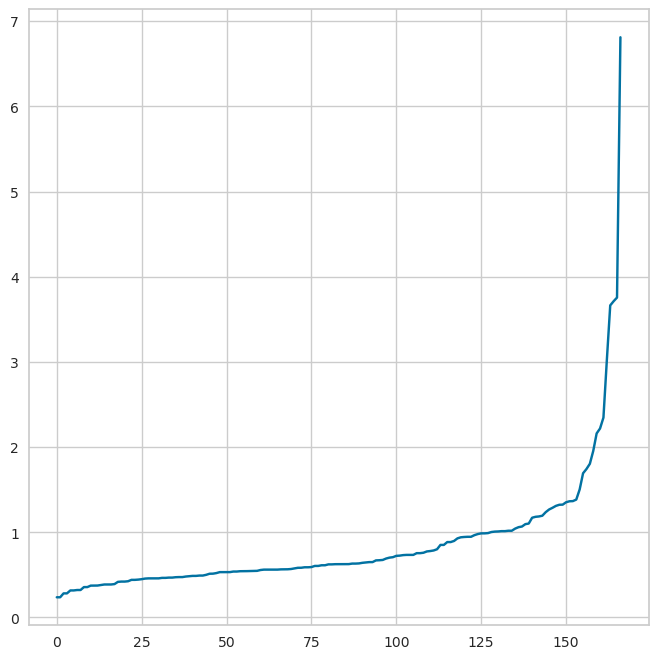

In [27]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 8,8
plt.plot(distances)

#### Thus we take epsilon as 1.3

In [28]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 1.3, min_samples = 4 )# minimum samples is set to 8
db.fit(data)

labels = db.labels_

print("Cluster assignments:\n", labels)


Cluster assignments:
 [ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0 -1 -1  0  0 -1  0  0  0  0
  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0  0  0]


#### The value of -1 typically represents noise points that do not belong to any cluster.

In [29]:
predictions_db = pd.Series(labels)
predictions_db

0      0
1      0
2      0
3     -1
4      0
      ..
162    0
163   -1
164    0
165    0
166    0
Length: 167, dtype: int64

In [30]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

# Print the value counts and percentages
print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")



Value counts:
Class -1: 27
Class 0: 140

Percentages:
Class -1: 16.17%
Class 0: 83.83%


In [31]:
print('Silhouette Score:', '%.2f'%silhouette_score(data, predictions_db))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(data, predictions_db))

Silhouette Score: 0.33
Davies Bouldin Score: 3.22


## Comparing the evaluation metrics of KMeans, Hierarchial and DBSCAN Clustering:

#### a) Kmeans: 
* Silhouette Score: 0.33
* Davies Bouldin Score: 0.97


#### b) Hierarchial: 
* Silhouette Score: 0.30
* Davies Bouldin Score: 1.25

#### c) DBSCAN:
* Silhouette Score: 0.33
* Davies Bouldin Score: 3.22



#### Result: As KMeans Clustering gave us the highest Silhouette Score and lowest Davies Bouldin Score, we will use it as our inference model.

****

# Inference:

### Visualising the clusters for every feature:

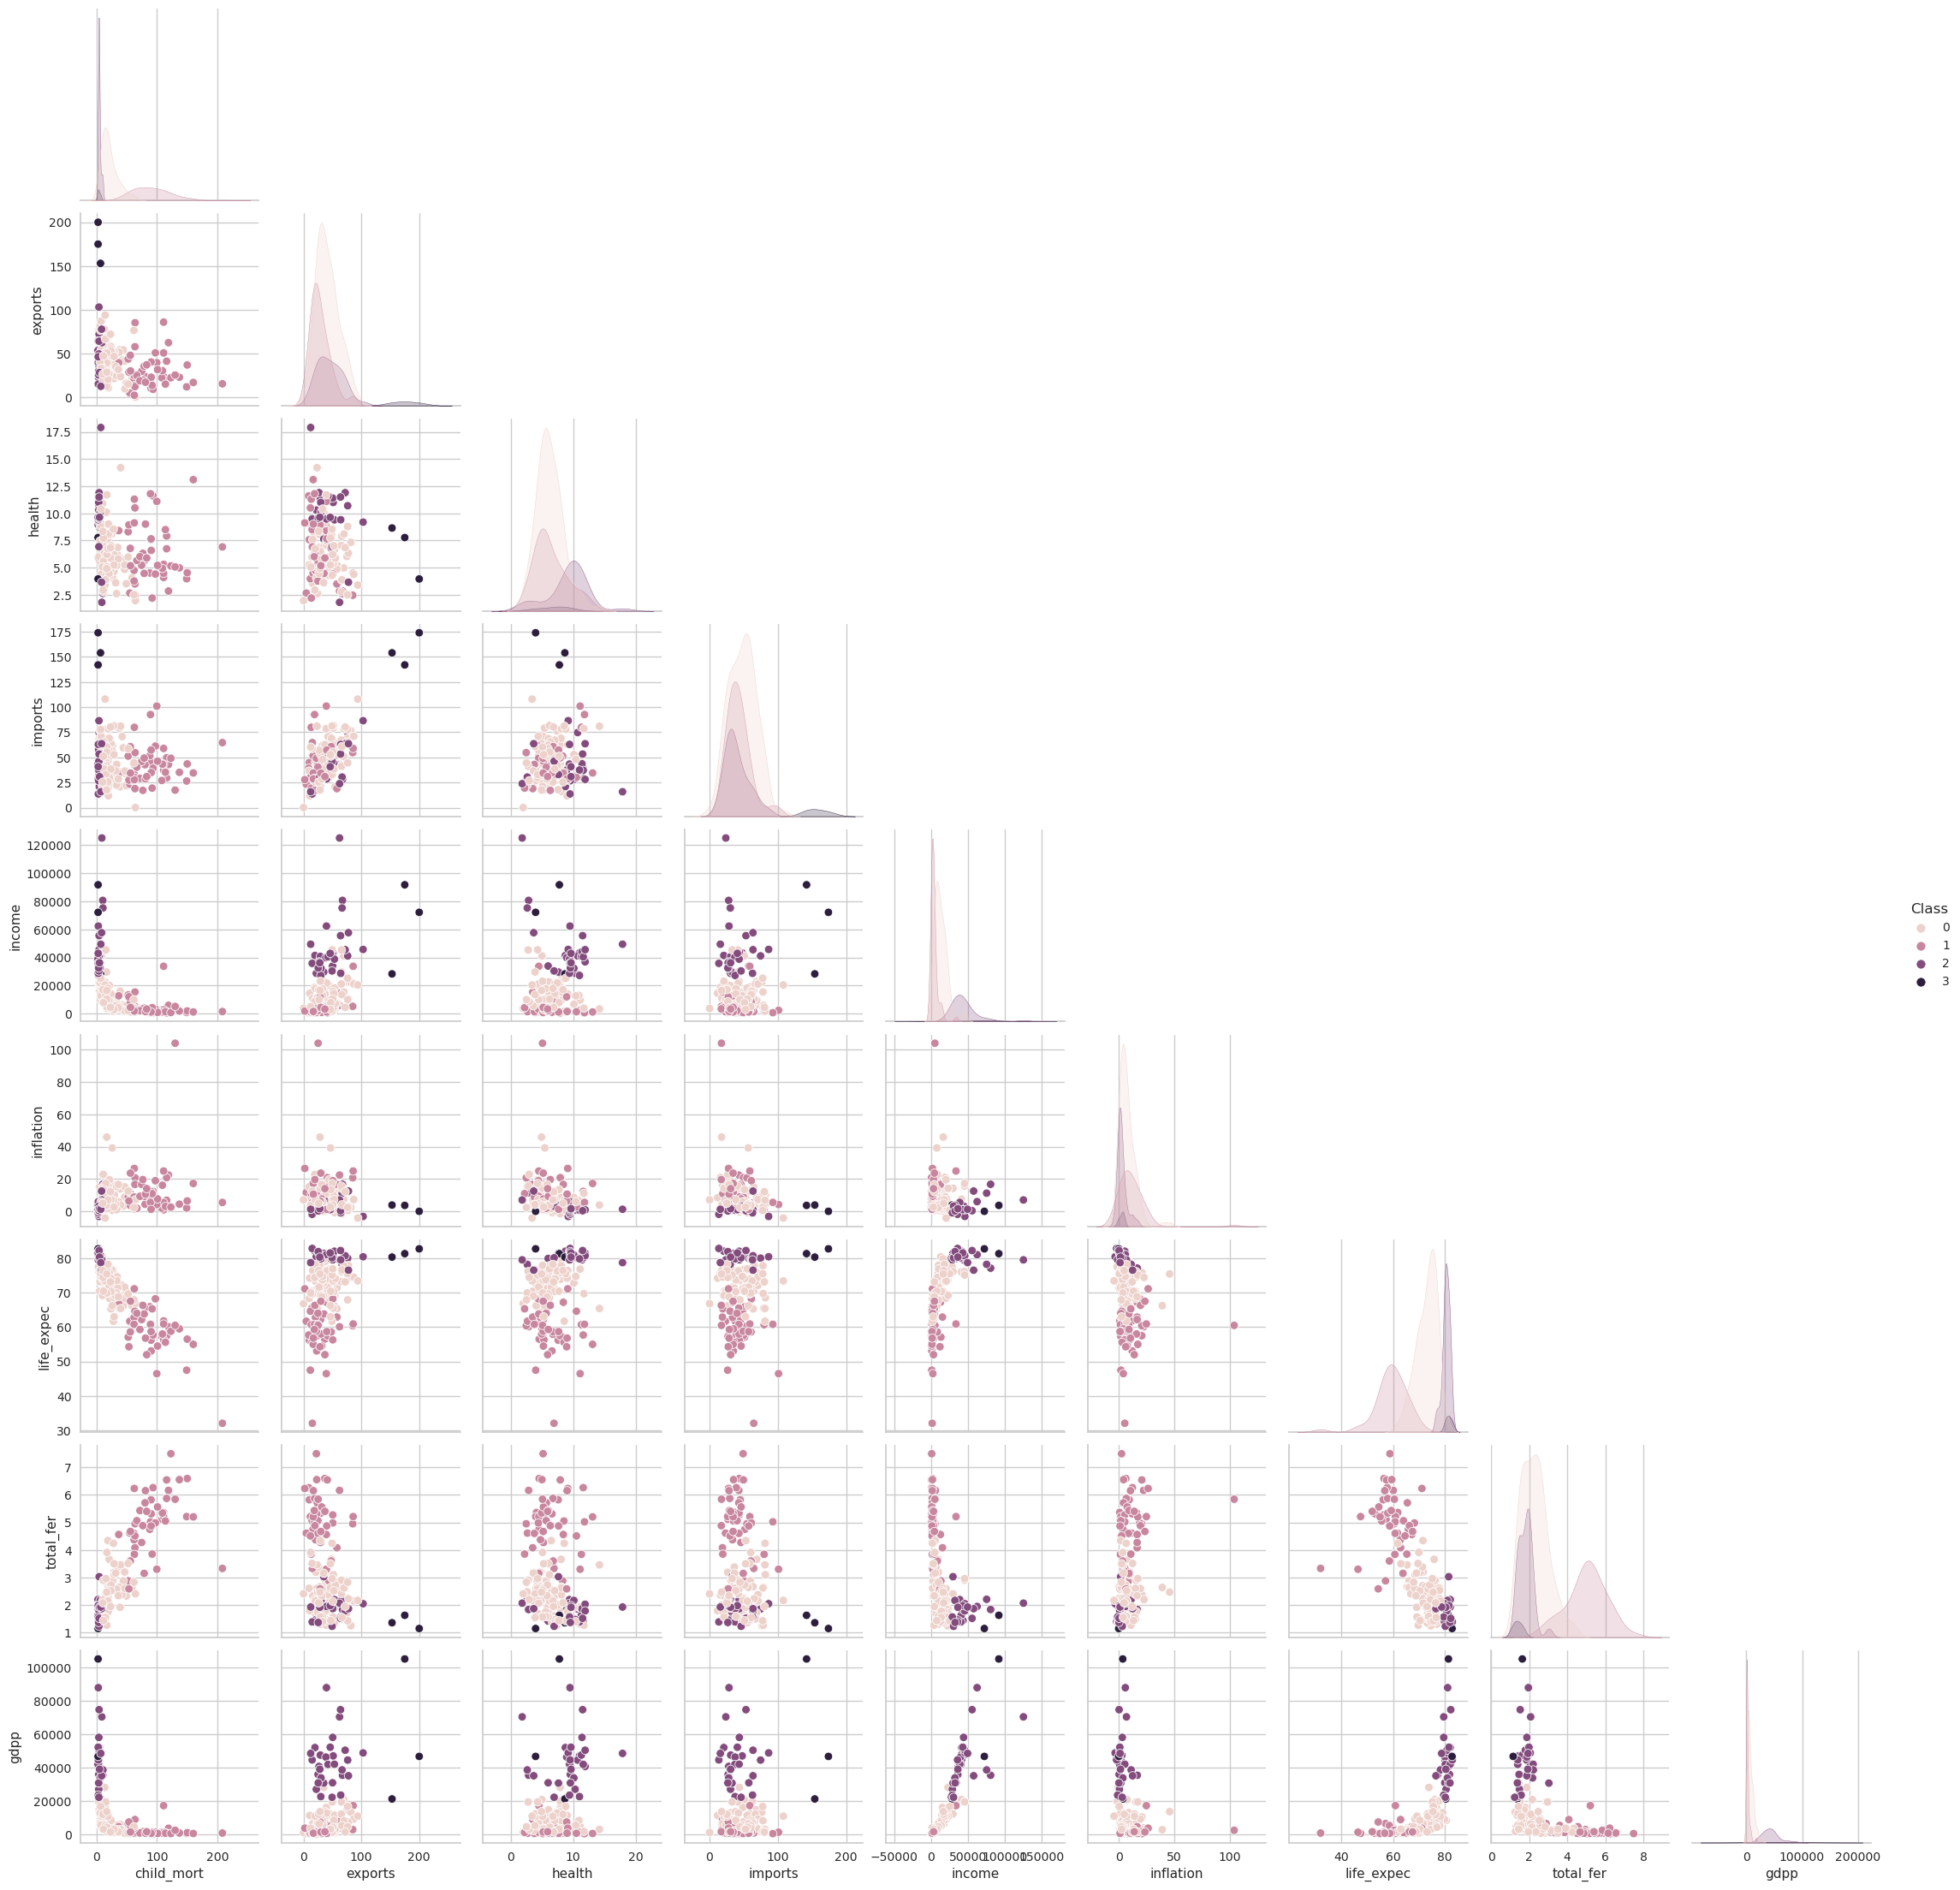

In [32]:
data_kmeans = df.copy()
data_kmeans['Class'] = predictions_pca
sns.pairplot(data_kmeans, hue = "Class", corner = True)

In [33]:
data_kmeans.groupby('Class').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Class,,,,,,,,,
0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [34]:
# Get the value counts and percentages of each class
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")


Value counts:
Class -1: 27
Class 0: 140

Percentages:
Class -1: 16.17%
Class 0: 83.83%


### Conclusions:

* There are 47 countries belonging to **cluster 1** and they are the **most underdeveloped countries**. This can be seen through the high child mortality, inflation as well as very low life expectancy, income, health index and gdp. These countries need the most help.

* There are only 3 countries belonging to **cluster 3**. These are the **most developed** countries with very high income, life expectancy and gdp.

* There are 30 countries belonging to **cluster 2** and they are also **developed countries**. Their lower income and gdp is what sets them apart from the most developed countries of cluster 3.

* There are 87 countries belonging to **cluster 0** and constitute over 50% of the total countries. These can all be categorized as '**developing**' as they are one step above the undeveloped countries but still have relatively low income, gdp and life expectancy, as well as higher child mortality and inflation. These countries may require help.